In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dfx=pd.read_csv(r'C:\Users\sanjil\Desktop\New folder\Train\Train.csv')
dfy=pd.read_csv(r'C:\Users\sanjil\Desktop\ytrain.csv')
x=np.array(dfx)
y=np.array(dfy)
print(x.shape)
print(y.shape)

(1600, 5)
(1600, 1)


In [13]:
ones=np.ones((x.shape[0],1))
x=np.concatenate((ones,x),axis=1)
print(x.shape)

(1600, 6)


In [25]:
def hypothesis(X,theta,n):
    m=X.shape[0]
    h=0
    for i in range(m):
        h+=X[i]*theta[i]
    
    return h
#error
def error(X,Y,theta,n):
    m=X.shape[0]
    err=0
    for i in range(m):
        h=hypothesis(X[i],theta,n)
        err+= (y[i]-h)**2
        
    return 0.5*err
#gradient
def gradient(X,Y,theta,n):
    m=X.shape[0]
    grad=np.zeros((n+1,1))
    for i in range(0,(n+1),1):
        for j in range(m):
            h=hypothesis(X[j],theta,n)
            grad[i]+=np.sum((h-y[j])*X[j][i])
    return grad
#gradient descent
def gradientdescent(X,Y,n,lr=0.0001):
    theta=np.ones((n+1,1))
    itr=0
    err_list=[]
    max_itr=100
    while itr<max_itr:
        e=error(X,Y,theta,n)
        grad=gradient(X,Y,theta,n)
        
        err_list.append(e)
        for i in range((n+1)):
            theta=theta-lr*grad
        itr+=1
    return theta,err_list
        
    


In [26]:
final_theta,err_list=gradientdescent(x,y,5)

In [27]:
print(final_theta)

[[ 4.99096674]
 [29.68187118]
 [92.66247759]
 [ 8.28062089]
 [44.76773522]
 [ 2.51916121]]


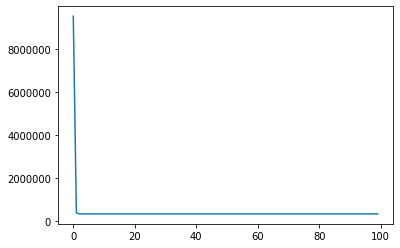

In [28]:
plt.plot(err_list)
plt.show()

In [32]:
xt=pd.read_csv(r'C:\Users\sanjil\Desktop\New folder\Test.csv')
xtest=np.array(xt)
print(xtest.shape)
ones=np.ones((xtest.shape[0],1),dtype='int32')
xtest=np.concatenate((ones,xtest),axis=1)
print(xtest.shape)

(400, 5)
(400, 6)


In [33]:
m = xtest.shape[0]
ypred=[]
for i in range(m):
    h=hypothesis(xtest[i],final_theta,4)
    ypred.append(h)
yfinal=np.array(ypred).reshape((400,1))

yfinal=pd.DataFrame(yfinal,columns=['Y']).to_csv("solution10.csv")